In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# Inferences using correlation - Attractiveness and Personality

This was a project I found on https://towardsdatascience.com/real-or-spurious-correlations-attractive-people-you-date-are-nastier-fa44a30a9452 and wanted to replicate. 
It tests the hypothesis of attractiveness and personality being negatively correlated when choosing a date/partner. 

We first draw a random result from a normal population. Then we add the two parameters (atrractiveness and personality) together to form a third paramter and choose only the top 20% of the values. We add a new parameter to get the highest scores for the cut-off condition. This is an inevitability if we want to take the highest 20% of multiple parameters.

Using our cut-off condition, we filter out results until only 100 entries our left from our initial 500.

We run a correlation again and find a negative relationship ln[12]. 

In [3]:
#setting a seed number to replicate results found on medium article
np.random.seed(1)

#500 dates to choose from
n=500

#generate personality and attractiveness data
#data is assumed to be normally distributed
#randn is used to generate random samples from a normal dist
data = {"personality":np.random.randn(n),
       "attractiveness":np.random.randn(n)} 

#store data in df
df = pd.DataFrame(data)    

C:\Users\Neil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


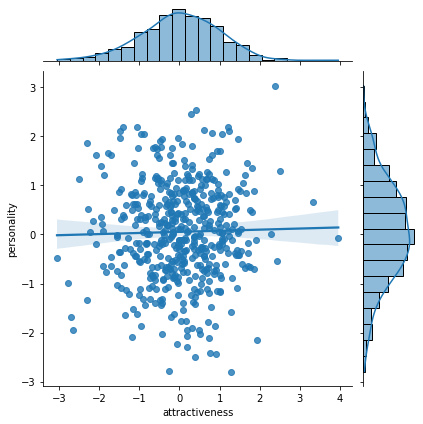

In [4]:
#using randn() the data generated is from a normal distribution and also the two variables will not correlate

sns.jointplot('attractiveness', 'personality', data = df, kind = 'reg')

In [5]:
#we now only select the top 20% of both the parameters
quantile = 0.80 #dating criterion

In [6]:
#add personality and attractiveness values 
df['personality_attractiveness'] = df['personality'] + df['attractiveness']

#determine cutoff value
cutoff = df['personality_attractiveness'].quantile(quantile)

#determine who to data/reject
#if higher than cutoff -> date, if lower -> reject
#save date/reject values in new 'outcome' column

#np.where parameters
df['outcome'] = np.where(df['personality_attractiveness']>cutoff, 'dated','rejected') 

In [7]:
#filtering data by choosing only rows of people we chose to date
dated = df.query('outcome == "dated"')

In [8]:
#verfiying if the dated data has 100 rows as per article
dated.shape

(100, 4)

C:\Users\Neil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='attractiveness', ylabel='personality'>

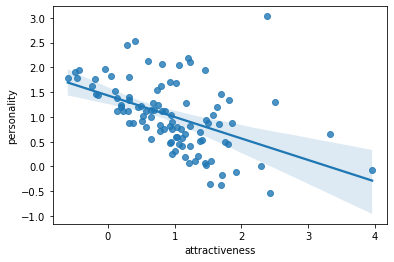

In [9]:
#Visualizing simulation results
sns.regplot('attractiveness', 'personality', data=dated)

In [10]:
#verifying that corr is -0.48 as per article
dated.corr()

,personality,attractiveness,personality_attractiveness
personality,1.000000,-0.480623,0.433797
attractiveness,-0.480623,1.000000,0.581628
personality_attractiveness,0.433797,0.581628,1.000000


# Running Simulations

The negative result may also have come about by chance. In order to verify the results, we run simulations using different seeds to measure similarity of results.

In [11]:
#def function to run simulations
def simulate(simulations = 1000, n=500, quantile = 0.80):
    
    #initialize array for storing simulated correlations
    #np.zeros is a function that returns an array filled with zeros
    correlations = np.zeros(simulations)
    
    #loop
    for i in range(simulations):
        
        #same code as above
        data = {'personality': np.random.randn(n),
                'attractiveness':np.random.randn(n)}
        df = pd.DataFrame(data) 
        
        #implementing the cutoff
        df['personality_attract']  = df['personality'] + df['attractiveness']
        cutoff = df['personality_attract'].quantile(quantile)
        df['outcome'] = np.where(df['personality_attract']>cutoff,'Dated','Rejected')
        dated = df.query('outcome == "dated"')
        
        #compute correlations between attractiveness and personality
        correlations[i]= dated.corr()['personality'][1]
        
    return correlations
